In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


In [179]:
data = pd.read_csv('data_pasien.csv')
data.head()


# exclude 

,NO,TANGGAL,NAMA PASIEN,ALAMAT LENGKAP,Nomor Hp,MEMBER,NON MEMBER,KELUHAN,UMUM/ GIGI,MEMBER FEE,NON MEMBER FEE,Member Remark,Age Category,Age,Gender,Cleaned DIAGNOSA,Cleaned TERAPI OBAT
0,1,2023-01-03,suparno,Desa Kanung 07/01,NaN,MEMBER,NaN,sakit gigi,P GIGI,NaN,0.0,1.0,Dewasa (19-59 thn),58.0,L,['gingival abscess'],"['clindamycin (3x1 dosage)', 'piroxicam (2x1 d..."
1,2,2023-01-03,roikhan,Ds Kanung 05/02,8.222944e+10,MEMBER,NaN,kontrol gigi,P GIGI,NaN,0.0,1.0,Dewasa (19-59 thn),32.0,L,"['gingivitis marginalis kronis', 'pulpitis irr...",['scaling procedure']
2,3,2022-01-05,ely ernawati,Desa rejosari RT/RW 02/01,NaN,NON MEMBER,NaN,scaling,P GIGI,NaN,60000.0,0.0,Dewasa (19-59 thn),34.0,P,['gingivitis marginalis kronis'],['scaling procedure']
3,4,2023-01-09,deafi septina,Desa rejosari RT/RW 1/1,8.581553e+12,MEMBER,NaN,cabut gigi,P GIGI,NaN,0.0,1.0,Anak (6-18 thn),15.0,P,['persistensi'],['exo ce']
4,5,2023-01-12,siti amirul,Rejosari 7/2,8.123438e+10,NaN,NON MEMBER,cabut gigi,P GIGI,NaN,90000.0,0.0,Dewasa (19-59 thn),40.0,P,"['pulpitis irversible', 'gingivitis marginalis...",['scaling procedure']


In [180]:
# --- Data Preparation ---
# Convert 'TANGGAL' column to datetime and handle errors
data['TANGGAL'] = pd.to_datetime(data['TANGGAL'], errors='coerce')

# Exclude year 2022 in 'TANGGAL' column
data = data[data['TANGGAL'].dt.year != 2022]

# Recode 'Member Remark': 0 -> 'Non Member', 1 -> 'Member'
data['Member Remark'] = data['Member Remark'].map({0: 'Non Member', 1: 'Member'})

# Create a new column for Month-Year
data['Month-Year'] = data['TANGGAL'].dt.to_period('M')

# Group the data by Month-Year and Member Remark and count occurrences
grouped_counts = data.groupby(['Month-Year', 'Member Remark']).size().unstack(fill_value=0)

# Convert the index to string for proper display in Plotly
grouped_counts.index = grouped_counts.index.astype(str)

# --- Plot Creation ---
fig = go.Figure()

# Add a bar trace for each Member Remark category so that bars will stack
colors = {'Member': '#87CEFA', 'Non Member': '#1E90FF'}
for remark in grouped_counts.columns:
    fig.add_trace(go.Bar(
        x=grouped_counts.index,
        y=grouped_counts[remark],
        name=remark,
        marker=dict(color=colors[remark], line=dict(width=0))
    ))

# Update layout for title, labels, and stacking mode
fig.update_layout(
    title='Count of Transaction by Month-Year and Member Remark',
    xaxis_title='Month-Year',
    yaxis_title='Count',
    xaxis=dict(type='category'),
    template='plotly_white',
    barmode='stack',  # Stack the bars on top of each other
    width=900,
    height=500
)

# Display the chart
fig.show()


In [181]:
# save fig as pickle file

import pickle 
with open('count_transaction.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [182]:
# calculate the average difference between each transaction Month-Year
monthly_counts_diff = monthly_counts.diff().mean()

# Create a line chart with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_counts.index,
    y=monthly_counts.values,
    mode='lines+markers',
    marker=dict(color='#6495ED'),
    name='Monthly Counts'
))

# Add a horizontal line for the average difference
fig.add_shape(
    type='line',
    x0=monthly_counts.index[0],
    x1=monthly_counts.index[-1],
    y0=monthly_counts.values[0] + monthly_counts_diff,
    y1=monthly_counts.values[0] + monthly_counts_diff,
    line=dict(color='red', width=1, dash='dash')
)

# Update layout for title and labels
fig.update_layout(
    title='Count of Transaction',
    xaxis_title='Month-Year',
    yaxis_title='Count',
    xaxis=dict(type='category'),  # Ensure Month-Year are treated as categorical
    template='plotly_white',  # Optional, choose a clean theme
    width=900,  # Width of the chart
    height=500  # Height of the chart
)

# Display the chart
fig.show()

In [183]:
# count the percentage change of transaction
monthly_counts.pct_change().dropna()

# Create a line chart with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_counts.index,
    y=monthly_counts.pct_change().dropna().values,
    mode='lines+markers',
    marker=dict(color='#FF6347'),
    name='Percentage Change'
))

# Update layout for title and labels
fig.update_layout(
    title='Percentage Change of Transaction',
    xaxis_title='Month-Year',
    yaxis_title='Percentage Change',
    xaxis=dict(type='category'),  # Ensure Month-Year are treated as categorical
    template='plotly_white',  # Optional, choose a clean theme
    width=900,  # Width of the chart
    height=500  # Height of the chart
)

# Display the chart
fig.show()


In [184]:
# calculate pct but not in percentage but in actual number
monthly_counts.diff().dropna().mean()



0.13043478260869565

In [185]:
variable_metrics = {}

In [186]:
average_transaction_monthly = monthly_counts.mean()
average_transaction_monthly = np.round(average_transaction_monthly,2)
average_transaction_monthly

variable_metrics['average_transaction_monthly'] = average_transaction_monthly

In [187]:
variable_metrics['standard_deviation_transaction_monthly'] = np.round(monthly_counts.std(),2)

variable_metrics['diff_transaction_monthly'] = monthly_counts.diff().mean()

In [188]:
variable_metrics

{'average_transaction_monthly': 21.17,
 'standard_deviation_transaction_monthly': 10.37,
 'diff_transaction_monthly': 0.13043478260869565}

In [192]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'TANGGAL' column to datetime and handle errors
data['TANGGAL'] = pd.to_datetime(data['TANGGAL'], errors='coerce')

# Exclude year 2022 in the 'TANGGAL' column
data = data[data['TANGGAL'].dt.year != 2022]

# Recode 'Member Remark': 0 -> 'Non Member', 1 -> 'Member'
# data['Member Remark'] = data['Member Remark'].map({0.0: 'Non Member', 1.0: 'Member'})

# Extract the year from the 'TANGGAL' column
data['Year'] = data['TANGGAL'].dt.year

# Group the data by Year and Member Remark and count occurrences
grouped_counts = data.groupby(['Year', 'Member Remark']).size().unstack(fill_value=0)

# Convert the index to string for proper display in Plotly
grouped_counts.index = grouped_counts.index.astype(int).astype(str)

# Create a stacked bar chart with Plotly
fig = go.Figure()

colors = {'Member': '#87CEFA', 'Non Member': '#1E90FF'}
# Add a bar trace for each Member Remark category to stack them
for remark in grouped_counts.columns:
    fig.add_trace(go.Bar(
        x=grouped_counts.index,
        y=grouped_counts[remark],
        name=remark,
        marker=dict(color=colors[remark],line=dict(width=0))
    ))

# Update layout for title, labels, and stacking mode
fig.update_layout(
    title='Count of Transaction by Year and Member Remark',
    xaxis_title='Year',
    yaxis_title='Count',
    xaxis=dict(type='category'),
    template='plotly_white',
    barmode='stack',  # Stack the bars on top of each other
    width=900,
    height=500
)

# Display the chart
fig.show()


In [193]:

import pickle 
with open('count_transaction_yearly.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [83]:
variable_metrics['average_transaction_yearly'] = yearly_counts.mean()
variable_metrics['standard_deviation_transaction_yearly'] = np.round(yearly_counts.std(),2)

In [17]:
# plot count transaction in scatter and find the trend
# Create a scatter plot with Plotly
fig = px.scatter(
    data_frame=monthly_counts,
    x=monthly_counts.index,
    y=monthly_counts.values,
    labels={'x': 'Month-Year', 'y': 'Count'},
    title='Count of Transaction',
    template='plotly_white',
    width=900,
    height=500
)

# Convert month-year index to datetime and then to numerical format
monthly_counts_datetime = pd.to_datetime(monthly_counts.index, format='%Y-%m')
monthly_counts_numeric = (monthly_counts_datetime - monthly_counts_datetime.min()).days

# Add a trendline
fig.add_trace(go.Scatter(
    x=monthly_counts.index,
    y=np.poly1d(np.polyfit(monthly_counts_numeric, monthly_counts.values, 1))(monthly_counts_numeric),
    mode='lines',
    marker=dict(color='red'),
    name='Trendline'
))

# Display the chart
fig.show()




In [18]:
# extract the slope and intercept of the trendline

# Calculate the slope and intercept of the trendline
slope, intercept = np.polyfit(monthly_counts_numeric, monthly_counts.values, 1)

slope * 12

0.16707358036679476

In [19]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Clean and process the Age column
data['Age'] = data['Age'].replace('?', np.nan)
data['Age'] = data['Age'].astype(float)

# Create a histogram using Plotly
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=data['Age'],
    nbinsx=10,  # Equivalent to bins=10
    marker=dict(color='skyblue', line=dict(color='black', width=1)),
    name='Age Distribution'
))

# Customize layout for improved visualization
fig.update_layout(
    title='Age Distribution',
    xaxis_title='Age',
    yaxis_title='Count',
    template='plotly_white',  # Clean white background style
    width=900,  # Chart width
    height=500,  # Chart height
    bargap=0.05,  # Slight gap between bars
    xaxis=dict(
        tickmode='linear',  # Ensure consistent linear ticks
        tick0=0,            # Start ticks at 0
        dtick=5             # Step size for ticks
    )
)

# Display the chart
fig.show()


In [20]:
# save into pickle file
with open('age_distribution.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [21]:
import plotly.graph_objects as go

# Count occurrences of each age category
age_category_counts = data['Age Category'].value_counts()

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=age_category_counts.index,
    y=age_category_counts.values,
    marker=dict(color='skyblue', line=dict(color='black', width=1)),
    name='Age Category Counts'
))

# Customize layout for improved visualization
fig.update_layout(
    title='Count for Each Age Category',
    xaxis_title='Age Category',
    yaxis_title='Count',
    template='plotly_white',
    width=900,
    height=500,
    xaxis=dict(
        tickangle=45,  # Rotate x-axis labels by 45 degrees
        title_standoff=20,  # Add space between labels and axis
    )
)

# Display the chart
fig.show()


In [22]:
# save into pickle file
with open('age_category_count.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [23]:
import plotly.graph_objects as go

# Count number of unique customers per year
data['Year'] = data['TANGGAL'].dt.year
average_unique_customer_per_year = data.groupby('Year')['NAMA PASIEN'].nunique()

# Create a horizontal bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=average_unique_customer_per_year.index.astype(int).astype(str),  # Convert years to int first and then to string to make them categorical
    x=average_unique_customer_per_year.values,  # Counts on the x-axis
    orientation='h',  # Horizontal bar chart
    marker=dict(color='#4682B4'),
    name='Unique Customers'
))

# Customize layout for better visualization
fig.update_layout(
    title='Average Unique Customer per Year',
    xaxis_title='Count',
    yaxis_title='Year',
    template='plotly_white',
    width=900,
    height=500,
    yaxis=dict(
        type='category',  # Treat the y-axis as categorical
        categoryorder='total ascending'  # Ensure the bars are sorted in ascending order by count
    )
)

# Display the chart
fig.show()


In [24]:
# save into pickle file
with open('average_unique_customer_per_year.pkl', 'wb') as f:
    pickle.dump(fig, f)



In [84]:
# Count unique occurrences of Gender per year
gender_counts_per_year = data.groupby(['Year', 'Gender'])['NAMA PASIEN'].nunique().unstack()

# Create a bar chart with Plotly
fig = go.Figure()

# Add bars for each gender
fig.add_trace(go.Bar(
    x=gender_counts_per_year.index.astype(int).astype(str),  # Convert years to string for display
    y=gender_counts_per_year['L'],  # Counts for 'L'
    name='L',
    marker=dict(color='#1E90FF')
))

fig.add_trace(go.Bar(
    x=gender_counts_per_year.index.astype(int).astype(str),  # Convert years to string for display
    y=gender_counts_per_year['P'],  # Counts for 'P'
    name='P',
    marker=dict(color='#FF69B4')
))

# Customize layout for better visualization
fig.update_layout(
    title='Unique Count of Gender per Year',
    xaxis_title='Year',
    yaxis_title='Unique Count',
    barmode='group',  # Group bars together
    template='plotly_white',
    width=900,
    height=500
)

# Display the chart
fig.show()

In [85]:
# save into pickle file
with open('count_unique_per_gender.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [86]:
import plotly.express as px
import pandas as pd

# Filter NON MEMBER FEE values greater than 0
non_member_fee = data[data['NON MEMBER FEE'] > 0]['NON MEMBER FEE']

# Create a histogram using Plotly
fig = px.histogram(
    non_member_fee,
    x=non_member_fee,  # Data for the histogram
    nbins=20,          # Number of bins
    title='NON MEMBER FEE Distribution',
    labels={'x': 'NON MEMBER FEE', 'y': 'Count'},  # Axis labels
)

# Update the layout for better visualization
fig.update_traces(marker=dict(color='#48D1CC', line=dict(color='black', width=1)))
fig.update_layout(
    xaxis_title='NON MEMBER FEE',
    yaxis_title='Count',
    template='plotly_white',
    bargap=0.05,  # Slight gap between bars
    width=900,
    height=500
)

# Display the histogram
fig.show()


In [87]:
# count NON MEMBER FEES <= 0
non_member_fee_zero = data[data['NON MEMBER FEE'] <= 0]['NON MEMBER FEE']
len(non_member_fee_zero)

151

In [88]:
len(non_member_fee)

269

In [89]:
# calculate len of MEMBER FEE <= 0 and len of MEMBER FEE > 0
len(data[data['MEMBER FEE'] <= 0]['MEMBER FEE']), len(data[data['MEMBER FEE'] > 0]['MEMBER FEE'])

(20, 62)

In [90]:
# non_member_fee = is NON MEMBER FEE column which is greater than 0 
member_fee = data[data['MEMBER FEE'] > 0]['MEMBER FEE']

# Create a histogram using Plotly
fig = px.histogram(
    member_fee,
    x=member_fee,  # Data for the histogram
    nbins=20,          # Number of bins
    title='MEMBER FEE Distribution',
    labels={'x': 'MEMBER FEE', 'y': 'Count'},  # Axis labels
)

# Update the layout for better visualization
fig.update_traces(marker=dict(color='#48D1CC', line=dict(color='black', width=1)))
fig.update_layout(
    xaxis_title='MEMBER FEE',
    yaxis_title='Count',
    template='plotly_white',
    bargap=0.05,  # Slight gap between bars
    width=900,
    height=500
)

# Display the histogram
fig.show()

In [91]:
# count rows where MEMBER FEE is not empty
len(data[data['MEMBER FEE'].isnull()]), len(data[data['NON MEMBER FEE'].isnull()])

(427, 89)

In [92]:
import plotly.express as px
import pandas as pd

# Combine NON MEMBER FEE and MEMBER FEE into a single DataFrame
non_member_fee = data[data['NON MEMBER FEE'] > 0][['NON MEMBER FEE']]
member_fee = data[data['MEMBER FEE'] > 0][['MEMBER FEE']]

# Add a column to label each row as 'Non Member' or 'Member'
non_member_fee = non_member_fee.rename(columns={'NON MEMBER FEE': 'Fee'})
non_member_fee['Type'] = 'Non Member'

member_fee = member_fee.rename(columns={'MEMBER FEE': 'Fee'})
member_fee['Type'] = 'Member'

# Combine the data
combined_data = pd.concat([non_member_fee, member_fee])

# Create a combined histogram using Plotly
fig = px.histogram(
    combined_data,
    x='Fee',            # Column for the histogram
    color='Type',       # Differentiates between Non Member and Member
    nbins=20,           # Number of bins
    title='Fee Distribution (Non Member vs Member)',
    labels={'Fee': 'Fee', 'y': 'Count'},  # Axis labels
    barmode='relative',  # Overlay the histograms
    color_discrete_map={'Non Member': '#1E90FF', 'Member': '#D2691E'}  # Specify colors for each type
)

# Update layout and styling
fig.update_traces(opacity=0.7,  # Slight transparency for overlap
                  marker_line=dict(width=1))  # Black outline for bars

fig.update_layout(
    xaxis_title='Fee',
    yaxis_title='Count',
    template='plotly_white',
    bargap=0.05,  # Slight gap between bars
    width=900,
    height=500,
)

# Display the combined histogram
fig.show()


In [93]:
# save into pickle file
with open('fee_distribution.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [97]:
variable_metrics['average_non_member_fee'] = non_member_fee['Fee'].mean()
variable_metrics['average_member_fee'] = member_fee['Fee'].mean()
variable_metrics

{'average_transaction_monthly': 21.17,
 'standard_deviation_transaction_monthly': 10.37,
 'diff_transaction_monthly': 0.13043478260869565,
 'average_transaction_yearly': 254.0,
 'standard_deviation_transaction_yearly': 43.84,
 'average_non_member_fee': 53629.628252788105,
 'average_member_fee': 29859.677419354837}

In [98]:
variable_metrics['std_non_member_fee'] = non_member_fee['Fee'].std()
variable_metrics['std_member_fee'] = member_fee['Fee'].std()



In [50]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Loop through each unique Type in your data and add a vertical box trace
for typ in combined_data['Type'].unique():
    # Filter data for the current type
    subset = combined_data[combined_data['Type'] == typ]
    
    # Add a vertical box plot trace
    fig.add_trace(go.Box(
        y=subset['Fee'],      # Use Fee on the y-axis for vertical orientation
        name=typ,             # Name of the trace (will be shown in the legend)
        boxpoints='all',      # Display all points similar to a swarm plot (optional)
        jitter=0.3,           # Add jitter to spread the points out
        orientation='v'       # Vertical orientation (default; can be omitted)
    ))

# Update layout to include title and axis labels, along with custom dimensions and template
fig.update_layout(
    title='Swarm Plot of Fee by Type',
    xaxis_title='Type',
    yaxis_title='Fee',
    template='plotly_white',
    width=900,
    height=500
)

# Display the plot
fig.show()


In [51]:
# save into pickle file
with open('fee_distribution_swarm.pkl', 'wb') as f:
    pickle.dump(fig, f)

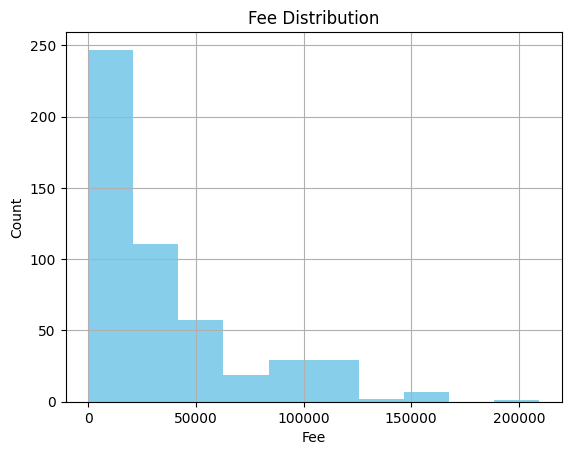

In [35]:
# create data['Fee'] column that will contain the value of 'MEMBER FEE' if 'MEMBER FEE' is not null, otherwise it will contain the value of 'NON MEMBER FEE'
data['Fee'] = data['MEMBER FEE'].fillna(data['NON MEMBER FEE'])

# create histogram for column 'Fee'
data['Fee'].hist(bins=10, color='skyblue')
plt.xlabel('Fee')
plt.ylabel('Count')
plt.title('Fee Distribution')
plt.show()

In [36]:
# calculate the average and standard deviation of 'Fee' column for Fee > 0
fee = data[data['Fee'] > 0]['Fee']
fee.mean(), fee.std()

(49177.25075528701, 36680.36910351724)

In [37]:
# calculate the average and standard deviation of 'Fee' for each 'Age Category'
data.groupby('Age Category')['Fee'].agg(['mean', 'std'])

# round the values to 2 decimal places and convert to proper df
grouped_by_age = data.groupby('Age Category')['Fee'].agg(['mean', 'std']).round(0).reset_index()

# set number in grouped_by_age to have a proper format of currency
grouped_by_age['mean'] = grouped_by_age['mean'].apply(lambda x: f'Rp {x:,.0f}')
grouped_by_age['std'] = grouped_by_age['std'].apply(lambda x: f'Rp {x:,.0f}')

grouped_by_age

,Age Category,mean,std
0,Anak (6-18 thn),"Rp 28,272","Rp 32,382"
1,Balita (1-5 thn),"Rp 11,572","Rp 16,679"
2,Dewasa (19-59 thn),"Rp 37,545","Rp 41,452"
3,Lansia (≥ 60 thn),"Rp 22,294","Rp 22,042"


In [38]:
# calculate the count of rows for each 'Age Category' and set as new column called 'Count' into grouped_by_age
grouped_by_age['Count'] = data['Age Category'].value_counts().sort_index().values

grouped_by_age



,Age Category,mean,std,Count
0,Anak (6-18 thn),"Rp 28,272","Rp 32,382",114
1,Balita (1-5 thn),"Rp 11,572","Rp 16,679",40
2,Dewasa (19-59 thn),"Rp 37,545","Rp 41,452",320
3,Lansia (≥ 60 thn),"Rp 22,294","Rp 22,042",35


In [39]:
grouped_by_age.to_csv('grouped_by_age.csv', index=False)

In [40]:
# Count each item in the 'KELUHAN' column
keluhan_counts = data['KELUHAN'].value_counts()

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=keluhan_counts.index,  # KELUHAN items on the x-axis
    y=keluhan_counts.values,  # Counts on the y-axis
    marker=dict(color='#4169E1', line=dict(color='black', width=1)),
    name='Keluhan Counts'
))

# Customize layout for improved visualization
fig.update_layout(
    title='Count of KELUHAN (Symptoms)',
    xaxis_title='KELUHAN',
    yaxis_title='Count',
    template='plotly_white',
    width=900,
    height=500,
    xaxis=dict(
        tickangle=0,  # Rotate x-axis labels by 45 degrees
        categoryorder='total descending',  # Sort by count in descending order
    ),
    bargap=0.1  # Slight gap between bars
)

# Display the chart
fig.show()


In [41]:
with open('keluhan_count.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [42]:
data['Cleaned DIAGNOSA']

0                                   ['gingival abscess']
1      ['gingivitis marginalis kronis', 'pulpitis irr...
3                                        ['persistensi']
4      ['pulpitis irversible', 'gingivitis marginalis...
5                       ['gingivitis marginalis kronis']
                             ...                        
505                            ['pulpitis irreversible']
506                                    ['periodentitis']
507                            ['pulpitis irreversible']
508                     ['gingivitis marginalis kronis']
509                            ['pulpitis irreversible']
Name: Cleaned DIAGNOSA, Length: 509, dtype: object

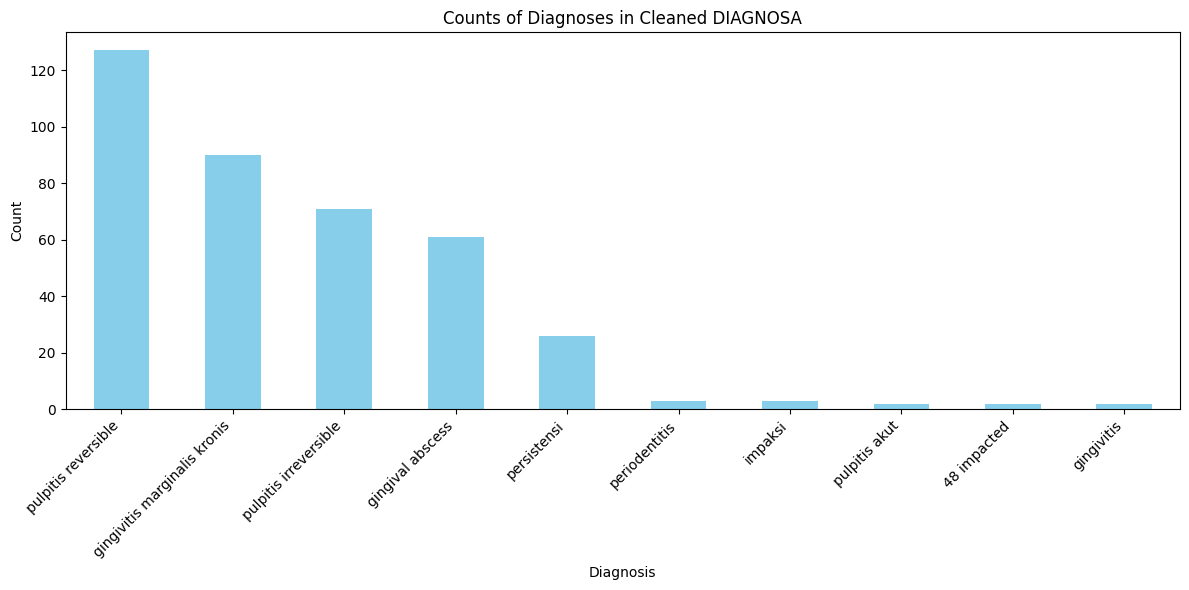

In [43]:
import ast
import matplotlib.pyplot as plt
from collections import Counter

# Convert the 'Cleaned DIAGNOSA' column from string representations of lists to actual lists
data['Cleaned DIAGNOSA'] = data['Cleaned DIAGNOSA'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
)

# Flatten the lists in 'Cleaned DIAGNOSA' column to extract all items
all_diagnoses = [item for sublist in data['Cleaned DIAGNOSA'] for item in sublist]

# Count the occurrences of each unique item
diagnosa_counts = pd.Series(Counter(all_diagnoses))

# Sort the counts for better visualization
diagnosa_counts = diagnosa_counts.sort_values(ascending=False)[:10]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
diagnosa_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Diagnosis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Counts of Diagnoses in Cleaned DIAGNOSA')
plt.tight_layout()
plt.show()


In [44]:

# Flatten the lists in 'Cleaned DIAGNOSA' column to extract all items
all_diagnoses = [item for sublist in data['Cleaned DIAGNOSA'] for item in sublist]

# Count the occurrences of each unique item
diagnosa_counts = pd.Series(Counter(all_diagnoses))

# Sort the counts for better visualization and get the top 10 diagnoses
diagnosa_counts = diagnosa_counts.sort_values(ascending=False)[:5]

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=diagnosa_counts.index,  # Diagnosis labels
    y=diagnosa_counts.values,  # Counts of each diagnosis
    marker=dict(color='#6495ED', line=dict(color='black', width=1)),  # Bar color
    name='Diagnoses'
))

# Customize layout
fig.update_layout(
    title='Counts of Diagnoses',
    xaxis_title='Diagnosis',
    yaxis_title='Count',
    template='plotly_white',
    width=900,
    height=500,
    xaxis=dict(
        tickangle=0,  # Rotate x-axis labels for better readability
        title_standoff=10  # Add some space between the title and labels
    ),
    bargap=0.1  # Slight gap between bars
)

fig.update_traces(marker_line=dict(width=1))


# Display the chart
fig.show()

In [45]:
with open('diagnosa_count.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [46]:
data = pd.read_csv('data_pasien.csv')

In [41]:
import ast
import pandas as pd
import plotly.graph_objects as go
from collections import Counter

# Convert the 'Cleaned TERAPI OBAT' column from string representations of lists to actual lists
data['Cleaned TERAPI OBAT'] = data['Cleaned TERAPI OBAT'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
)

# Flatten the lists in 'Cleaned TERAPI OBAT' column to extract all items
all_medicines = [item for sublist in data['Cleaned TERAPI OBAT'] for item in sublist]

# Count the occurrences of each unique item
medicine_counts = pd.Series(Counter(all_medicines))

# Sort the counts for better visualization and get the top 5 medicines
medicine_counts = medicine_counts.sort_values(ascending=False)[:5]

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=medicine_counts.index,  # Medicine names
    y=medicine_counts.values,  # Counts of each medicine
    marker=dict(color='#6495ED', line=dict(color='black', width=1)),  # Bar color
    name='Medicines'
))

# Customize layout
fig.update_layout(
    title='Counts of Treatments',
    xaxis_title='Treatment Medicine',
    yaxis_title='Count',
    template='plotly_white',
    width=900,
    height=500,
    xaxis=dict(
        tickangle=0,  # Rotate x-axis labels for better readability
        title_standoff=10  # Add some space between the title and labels
    )
)

# Display the chart
fig.show()


In [42]:
# save into pickle file
with open('treatment_count.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [99]:
# save variable_metrics into pickle file
with open('variable_metrics.pkl', 'wb') as f:
    pickle.dump(variable_metrics, f)